<a href="https://colab.research.google.com/github/NitinBodhare/Rice_Leaf/blob/master/Rice-Leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# !unzip "/content/Bacterial leaf blight-20200814T055237Z-001.zip" -d Extrated_Data
!unzip "/content/Brown spot-20200814T055208Z-001.zip" -d Extrated_Data
!unzip "/content/Leaf smut-20200814T055530Z-001.zip" -d Extrated_Data

Archive:  /content/Brown spot-20200814T055208Z-001.zip
replace Extrated_Data/Brown spot/DSC_0394.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: o
error:  invalid response [o]
replace Extrated_Data/Brown spot/DSC_0394.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: o
error:  invalid response [o]
replace Extrated_Data/Brown spot/DSC_0394.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Extrated_Data/Brown spot/DSC_0394.jpg  
replace Extrated_Data/Brown spot/DSC_0324.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Extrated_Data/Brown spot/DSC_0324.JPG  
  inflating: Extrated_Data/Brown spot/DSC_0391.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0109.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0119.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0116.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0115.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0117.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0118.jpg  
  inflating: Extrated_Data/Brown spot/DSC_0114.jpg  
  inflati

In [ ]:
data_dir="/content/Extrated_Data"

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/content/Extrated_Data')

In [ ]:
dict = {
    "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
    "brown": list(data_dir.glob("Brown spot/*")),
    "smut": list(data_dir.glob("Leaf smut/*"))
}


In [ ]:
# bacterial=list(data_dir.glob('Bacterial leaf blight/*'))
# brown=list(data_dir.glob('Brown spot/*'))
# smut=list(data_dir.glob('Leaf smut/*'))

In [ ]:
# print(len(bacterial))
# print(len(brown))
# print(len(smut))
# total = len(bacterial) + len(brown) + len(smut)
# print(f'total:{total}')


40
40
39
total:119


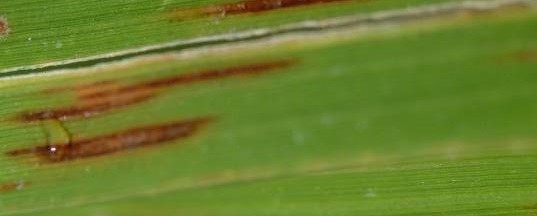

In [ ]:
PIL.Image.open(str(smut[0]))

In [ ]:
# # OpenCV way
# img = cv2.imread(str(dict["smut"][0]))

# # PIL way
# img = PIL.Image.open(dict['smut'][0])


In [ ]:
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,

}

In [ ]:
# str(dict['smut'][0])

'/content/Extrated_Data/Leaf smut/DSC_0510.jpg'

In [ ]:
str(smut[0])

'/content/Extrated_Data/Leaf smut/DSC_0510.jpg'

In [ ]:
img=cv2.imread(str((dict["smut"][0])))

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(labels_dict[name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3941 - loss: 2.8571
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3673 - loss: 1.9169
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4781 - loss: 1.0682
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4855 - loss: 0.9789
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6293 - loss: 0.8427
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6965 - loss: 0.8722
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6381 - loss: 0.7813
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6300 - loss: 0.7456
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7761 - loss: 0.6733
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8068 - loss: 0.5432
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8606 - loss: 0.3885
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8281 - loss: 0.3935
Epoch 13/30
3/3 ━━━━━━━━━

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.7000 - loss: 1.1158


[1.1158102750778198, 0.699999988079071]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


array([[ 1.03277600e+00, -3.86702657e-01, -5.47234488e+00],
       [-7.18755436e+00,  1.24537599e+00,  3.90486193e+00],
       [-5.12373352e+00,  1.48736167e+00,  9.47795451e-01],
       [-3.72648764e+00,  2.32176971e+00, -3.07821488e+00],
       [-1.17779741e+01, -1.65089107e+00,  1.16653376e+01],
       [ 4.56363392e+00, -5.97345173e-01, -1.11173344e+01],
       [ 2.61105180e+00, -2.00999403e+00, -4.12116194e+00],
       [ 1.86372352e+00, -6.36573076e-01, -5.48339462e+00],
       [-9.88557637e-01,  5.94351828e-01, -3.20518184e+00],
       [-1.17829123e+01,  1.53785837e+00,  7.05126762e+00],
       [ 1.44781613e+00, -3.31799090e-01, -5.65301371e+00],
       [-2.22684231e+01,  1.11831303e+01,  6.96624088e+00],
       [ 6.86495781e+00, -3.43979669e+00, -9.51775646e+00],
       [-3.16547775e+00,  2.42409134e+00, -4.29459286e+00],
       [-5.03730392e+00,  3.74366140e+00, -2.65911889e+00],
       [-2.72114925e+01,  1.47461996e+01,  6.79641199e+00],
       [ 5.15364218e+00, -1.76436710e+00

In [ ]:
score = tf.nn.softmax(predictions[0])


In [ ]:
np.argmax(score)

np.int64(0)

In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal")
])


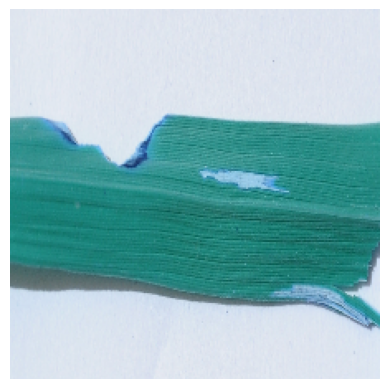

In [ ]:
plt.axis('off')
plt.imshow(X[0])

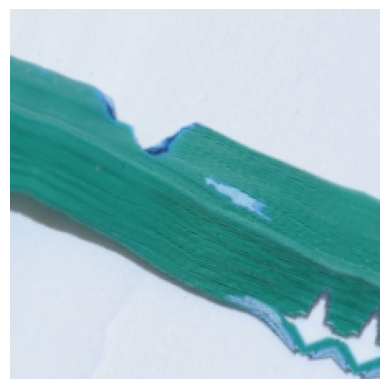

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3326 - loss: 1.7770
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3365 - loss: 3.0830
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3136 - loss: 1.1936
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3131 - loss: 1.1117
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5136 - loss: 1.0337
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6293 - loss: 1.0197
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5302 - loss: 0.9670
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5844 - loss: 0.9393
Epoch 9/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6068 - loss: 0.9461
Epoch 10/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5336 - loss: 0.8836
Epoch 11/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6674 - loss: 0.8262
Epoch 12/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7055 - loss: 0.7520
Epoch 13/40
3/3 ━━━━━━━━

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step - accuracy: 0.7000 - loss: 0.7935


[0.7935264706611633, 0.699999988079071]